In [1]:
import numpy as np, urllib.request as req
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA
url = "http://sprotasov.ru/files/food.txt"
raw = req.urlopen(url).read().decode('utf-8')
lines = raw.split('\n')
table = [s.strip().split('\t') for s in lines]

In [3]:
# заголовки измерений
headers = table[0][2:]
# названия продуктов
products = [row[0] for row in table[1:]]
# категории
cats = [row[1] for row in table[1:]]
catset = set(cats)
# собственно данные
data = [list(map(float, row[2:])) for row in table[1:]]

In [4]:
M = np.matrix(data)
mean = M.mean(0)

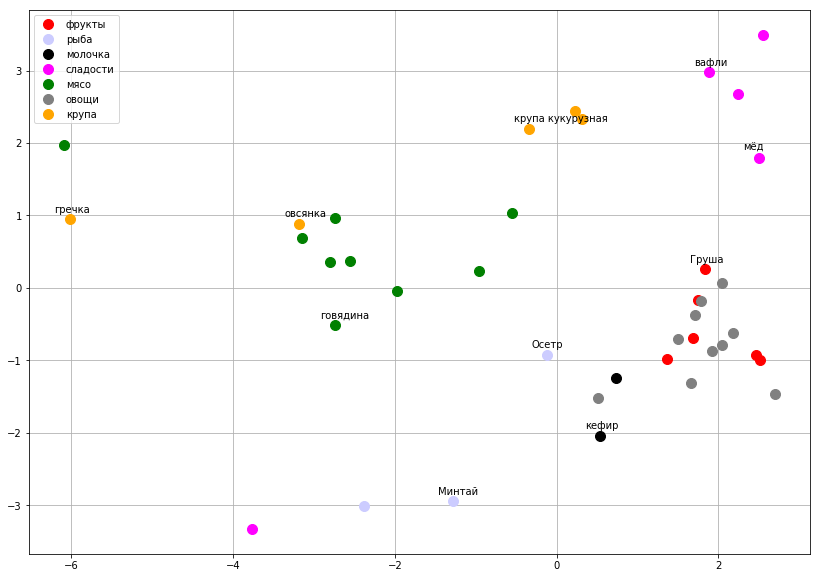

In [10]:
N = 2 # снижаем размерность до 2
d = PCA(M).Y[:,:N]
x = d.T.A[0]
y = d.T.A[1]
colors = ['red', '#CCCCFF', 'black', 'magenta', 'green', 'gray', 'orange']
interesting = {'крупа кукурузная', 'гречка', 'овсянка', 'Осетр', 'вафли', 'мёд', 'кефир','говядина', 'Груша', 'Минтай'}
cd = dict(zip(list(catset), colors))

plt.figure(figsize=(14,10))
for cat in catset:
    xa = [p[0] for p in zip(x, cats) if p[1] == cat]
    ya = [p[0] for p in zip(y, cats) if p[1] == cat]
    id = [p[0] for p in zip(range(len(x)), cats) if p[1] == cat]
    for i in id:
        if products[i] in interesting:
            plt.annotate(products[i], xy=(x[i], y[i]), xytext=(-15, 7), textcoords='offset points')
    plt.plot(xa, ya, 'o', markersize=10,color=cd[cat],label=cat)
plt.legend()
plt.grid(True)
plt.show()